In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
Orders = pd.read_csv('../data/Orders.csv')
Returns = pd.read_csv('../data/Returns.csv')

In [139]:
Returns.head()

Returned                  Order.ID        Region
0      Yes  CA-2012-SA20830140-41210    Central US
1      Yes  IN-2012-PB19210127-41259  Eastern Asia
2      Yes  CA-2012-SC20095140-41174    Central US
3      Yes    IN-2015-JH158207-42140       Oceania
4      Yes    IN-2014-LC168857-41747       Oceania

In [140]:
Orders.Profit = [x.replace('$', '') for x in Orders['Profit']]
Orders.Profit = [x.replace(',', '') for x in Orders['Profit']]
Orders.Sales = [x.replace('$', '') for x in Orders['Sales']]
Orders.Sales = [x.replace(',', '') for x in Orders['Sales']]

In [141]:
Orders.Profit = Orders.Profit.astype(float)
Orders.Sales = Orders.Sales.astype(float)

In [142]:
Orders.head()

Row.ID                  Order.ID Order.Date Ship.Date     Ship.Mode  \
0   40098  CA-2014-AB10015140-41954   11/11/14  11/13/14   First Class   
1   26341    IN-2014-JR162107-41675     2/5/14    2/7/14  Second Class   
2   25330    IN-2014-CR127307-41929   10/17/14  10/18/14   First Class   
3   13524   ES-2014-KM1637548-41667    1/28/14   1/30/14   First Class   
4   47221   SG-2014-RH9495111-41948    11/5/14   11/6/14      Same Day   

    Customer.ID     Customer.Name      Segment  Postal.Code           City  \
0  AB-100151402     Aaron Bergman     Consumer      73120.0  Oklahoma City   
1     JR-162107     Justin Ritter    Corporate          NaN     Wollongong   
2     CR-127307      Craig Reiter     Consumer          NaN       Brisbane   
3    KM-1637548  Katherine Murray  Home Office          NaN         Berlin   
4    RH-9495111       Rick Hansen     Consumer          NaN          Dakar   

        ...         Product.ID    Category Sub.Category  \
0       ...        TEC-PH-5816  Technology       Phones   
1       ...        FUR-CH-5379   Furniture       Chairs   
2       ...        TEC-PH-5356  Technology       Phones   
3       ...        TEC-PH-5267  Technology       Phones   
4       ...        TEC-CO-6011  Technology      Copiers   

                                Product.Name    Sales Quantity Discount  \
0                           Samsung Convoy 3   221.98        2      0.0   
1  Novimex Executive Leather Armchair, Black  3709.40        9      0.1   
2          Nokia Smart Phone, with Caller ID  5175.17        9      0.1   
3             Motorola Smart Phone, Cordless  2892.51        5      0.1   
4             Sharp Wireless Fax, High-Speed  2832.96        8      0.0   

   Profit  Shipping.Cost  Order.Priority  
0   62.15          40.77            High  
1 -288.77         923.63        Critical  
2  919.97         915.49          Medium  
3  -96.54         910.16          Medium  
4  311.52         903.04        Critical  

[5 rows x 24 columns]

In [143]:
Orders['Order.Date'] = pd.to_datetime(Orders['Order.Date'])
Orders['Ship.Date'] = pd.to_datetime(Orders['Ship.Date'])

In [144]:
Returns = pd.merge(Orders, Returns, on = 'Order.ID', how='inner')
Returns.head()

Row.ID                  Order.ID Order.Date  Ship.Date    Ship.Mode  \
0   30191  IN-2012-PB19210127-41259 2012-12-16 2012-12-19  First Class   
1   30190  IN-2012-PB19210127-41259 2012-12-16 2012-12-19  First Class   
2   30187  IN-2012-PB19210127-41259 2012-12-16 2012-12-19  First Class   
3   30193  IN-2012-PB19210127-41259 2012-12-16 2012-12-19  First Class   
4   30189  IN-2012-PB19210127-41259 2012-12-16 2012-12-19  First Class   

   Customer.ID   Customer.Name    Segment  Postal.Code    City      ...       \
0  PB-19210127  Phillip Breyer  Corporate          NaN  Taipei      ...        
1  PB-19210127  Phillip Breyer  Corporate          NaN  Taipei      ...        
2  PB-19210127  Phillip Breyer  Corporate          NaN  Taipei      ...        
3  PB-19210127  Phillip Breyer  Corporate          NaN  Taipei      ...        
4  PB-19210127  Phillip Breyer  Corporate          NaN  Taipei      ...        

  Sub.Category                                 Product.Name    Sales Quantity  \
0       Tables  Lesro Conference Table, with Bottom Storage  1715.16        2   
1    Bookcases                 Safco Classic Bookcase, Pine  2197.50        5   
2       Tables       Lesro Round Table, with Bottom Storage  1356.03        3   
3       Chairs         Office Star Swivel Stool, Adjustable   882.15        5   
4     Machines                      Okidata Calculator, Red   148.32        3   

  Discount  Profit Shipping.Cost Order.Priority  Returned      Region_y  
0      0.0  720.36        725.57       Critical       Yes  Eastern Asia  
1      0.0  153.75        627.27       Critical       Yes  Eastern Asia  
2      0.0  311.85        458.97       Critical       Yes  Eastern Asia  
3      0.0  114.60        203.92       Critical       Yes  Eastern Asia  
4      0.0   68.22         25.48       Critical       Yes  Eastern Asia  

[5 rows x 26 columns]

In [145]:
df = Orders.groupby(['Order.Date','Category']).agg({'Sales':sum}).reset_index()

In [146]:
df.head()

Order.Date         Category    Sales
0 2012-01-01        Furniture   113.67
1 2012-01-01  Office Supplies   694.90
2 2012-01-02       Technology   314.22
3 2012-01-03        Furniture  1960.82
4 2012-01-03  Office Supplies  1172.89

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x123c062e8>]],
      dtype=object)

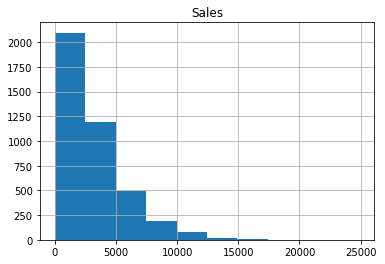

In [147]:
df.hist()

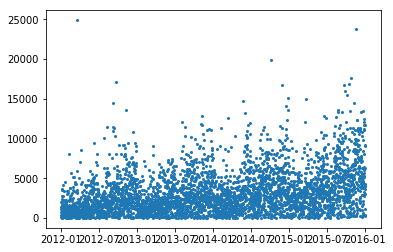

In [148]:

plt.plot(df['Order.Date'], df['Sales'], marker='o', linestyle='', ms=2)
plt.show()


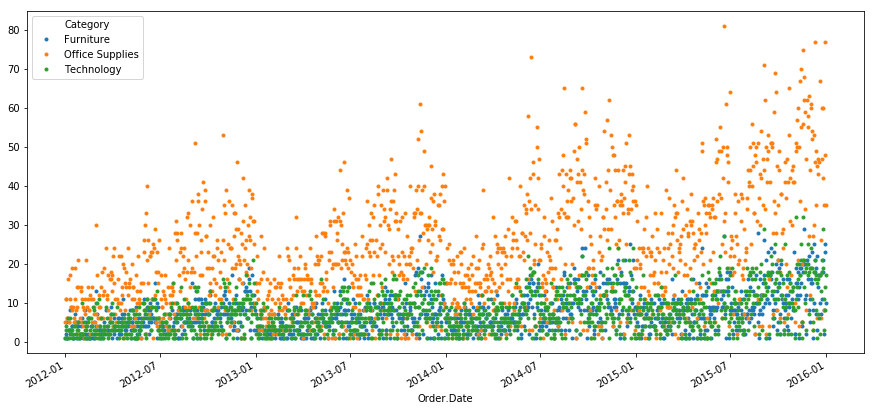

In [149]:
# plot sales by category by day
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
Orders.groupby(['Order.Date','Category']).count()['Sales'].unstack().plot(ax=ax,  marker='o', linestyle='', ms=3)
plt.show()

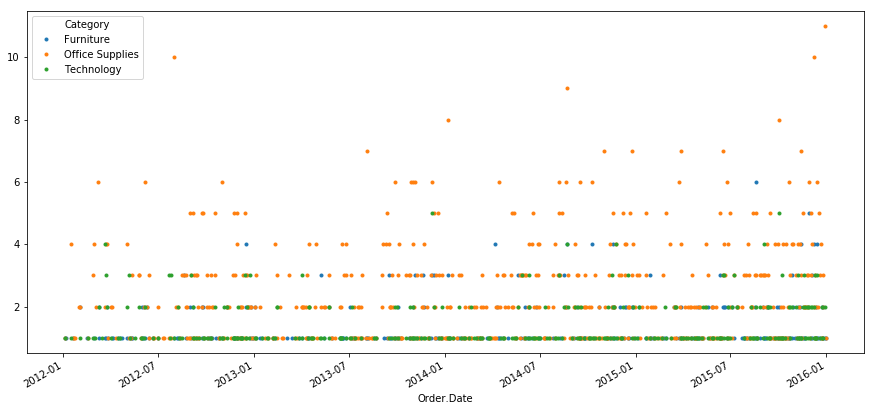

In [150]:
# plot returns by category by day
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
Returns.groupby(['Order.Date','Category']).count()['Sales'].unstack().plot(ax=ax,  marker='o', linestyle='', ms=3)
plt.show()

In [151]:
Returns.head()

Row.ID                  Order.ID Order.Date  Ship.Date    Ship.Mode  \
0   30191  IN-2012-PB19210127-41259 2012-12-16 2012-12-19  First Class   
1   30190  IN-2012-PB19210127-41259 2012-12-16 2012-12-19  First Class   
2   30187  IN-2012-PB19210127-41259 2012-12-16 2012-12-19  First Class   
3   30193  IN-2012-PB19210127-41259 2012-12-16 2012-12-19  First Class   
4   30189  IN-2012-PB19210127-41259 2012-12-16 2012-12-19  First Class   

   Customer.ID   Customer.Name    Segment  Postal.Code    City      ...       \
0  PB-19210127  Phillip Breyer  Corporate          NaN  Taipei      ...        
1  PB-19210127  Phillip Breyer  Corporate          NaN  Taipei      ...        
2  PB-19210127  Phillip Breyer  Corporate          NaN  Taipei      ...        
3  PB-19210127  Phillip Breyer  Corporate          NaN  Taipei      ...        
4  PB-19210127  Phillip Breyer  Corporate          NaN  Taipei      ...        

  Sub.Category                                 Product.Name    Sales Quantity  \
0       Tables  Lesro Conference Table, with Bottom Storage  1715.16        2   
1    Bookcases                 Safco Classic Bookcase, Pine  2197.50        5   
2       Tables       Lesro Round Table, with Bottom Storage  1356.03        3   
3       Chairs         Office Star Swivel Stool, Adjustable   882.15        5   
4     Machines                      Okidata Calculator, Red   148.32        3   

  Discount  Profit Shipping.Cost Order.Priority  Returned      Region_y  
0      0.0  720.36        725.57       Critical       Yes  Eastern Asia  
1      0.0  153.75        627.27       Critical       Yes  Eastern Asia  
2      0.0  311.85        458.97       Critical       Yes  Eastern Asia  
3      0.0  114.60        203.92       Critical       Yes  Eastern Asia  
4      0.0   68.22         25.48       Critical       Yes  Eastern Asia  

[5 rows x 26 columns]

In [152]:
# Sum of the returns
sum(Returns.Sales)

525932.4100000008

In [155]:
# Number of Returns
count_returns = Returns.groupby(['Customer.Name']).count()['Sales']

In [162]:
# Number of returns greater than 1
sum(count_returns >= 2)

448

In [163]:
# Number of returns greater than 5
sum(count_returns >= 6)

124

In [169]:
# Returns by region
region_returns = Returns.groupby(['Region_y']).count()['Sales']
region_returns

Region_y
Caribbean             69
Central Africa        17
Central America      248
Central Asia           9
Central US            71
Eastern Africa        18
Eastern Asia         131
Eastern Canada        10
Eastern Europe        42
Eastern US           134
North Africa          51
Northern Europe       76
Oceania              154
South America        133
Southeastern Asia    140
Southern Africa       25
Southern Asia        111
Southern Europe      112
Southern US           83
Western Africa        60
Western Asia         108
Western Canada         5
Western Europe       233
Western US           180
Name: Sales, dtype: int64

In [170]:
# Returns by category
cat_returns = Returns.groupby(['Category']).count()['Sales']
cat_returns

Category
Furniture           427
Office Supplies    1348
Technology          445
Name: Sales, dtype: int64

In [166]:
# Returns by subcategory
sub_cat_returns = Returns.groupby(['Sub.Category']).count()['Sales']
sub_cat_returns

Sub.Category
Accessories    138
Appliances      59
Art            217
Binders        269
Bookcases      104
Chairs         147
Copiers         99
Envelopes       99
Fasteners      102
Furnishings    135
Labels         137
Machines        63
Paper          150
Phones         145
Storage        212
Supplies       103
Tables          41
Name: Sales, dtype: int64